In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n0 = 50  # Initial number of agents
p = 0.5  # Probability of edge creation
beta_n = 0.1 / n0  # Infection rate
delta_n = 0.15 * p  # Recovery rate
mu_a = 7  # Arrival rate
mu_d = 7  # Departure rate
simulation_time = 5  # Total simulation time
time_step = 0.01  # Time step for the simulation

# Initialize network
G = nx.erdos_renyi_graph(n0, p)
adj_matrix = nx.adjacency_matrix(G).toarray()
lambda_1 = np.max(np.linalg.eigvals(adj_matrix))

# Initial state: all nodes are susceptible
state = np.zeros(n0)

# Function to simulate the SIS epidemic with arrivals and departures
def simulate_sis_with_arrivals_departures(adj_matrix, state, beta_n, delta_n, mu_a, mu_d, time_step, simulation_time):
    num_nodes = state.shape[0]
    time_points = int(simulation_time / time_step)
    infected_counts = np.zeros(time_points)
    total_population = np.zeros(time_points)
    arrival_times = []
    departure_times = []
    
    for t in range(time_points):
        # Infection and recovery process
        for i in range(num_nodes):
            if state[i] == 1:  # Infected
                if np.random.rand() < delta_n * time_step:
                    state[i] = 0  # Recovered
            else:  # Susceptible
                neighbors = np.where(adj_matrix[i] == 1)[0]
                for neighbor in neighbors:
                    if state[neighbor] == 1 and np.random.rand() < beta_n * time_step:
                        state[i] = 1  # Infected
                        break
        
        # Arrivals
        if np.random.rand() < mu_a * time_step:
            arrival_times.append(t * time_step)
            new_infection_prob = np.random.rand()
            new_node_state = 1 if np.random.rand() < new_infection_prob else 0
            state = np.append(state, new_node_state)
            new_row = np.zeros((1, state.shape[0] - 1))
            new_col = np.zeros((state.shape[0], 1))
            adj_matrix = np.hstack((adj_matrix, new_col[:-1]))
            adj_matrix = np.vstack((adj_matrix, np.hstack((new_row, np.zeros((1, 1))))))
            new_edges = np.random.rand(state.shape[0] - 1) < p
            adj_matrix[-1, :-1] = new_edges
            adj_matrix[:-1, -1] = new_edges
        
        # Departures
        if np.random.rand() < mu_d * time_step and state.shape[0] > 1:
            departure_times.append(t * time_step)
            departing_node = np.random.randint(0, state.shape[0])
            state = np.delete(state, departing_node)
            adj_matrix = np.delete(adj_matrix, departing_node, axis=0)
            adj_matrix = np.delete(adj_matrix, departing_node, axis=1)
        
        infected_counts[t] = np.sum(state == 1)
        total_population[t] = state.shape[0]
    
    return infected_counts / total_population, total_population, arrival_times, departure_times

infected_ratio, population_size, arrival_times, departure_times = simulate_sis_with_arrivals_departures(
    adj_matrix, state, beta_n, delta_n, mu_a, mu_d, time_step, simulation_time)


IndexError: index 49 is out of bounds for axis 0 with size 49

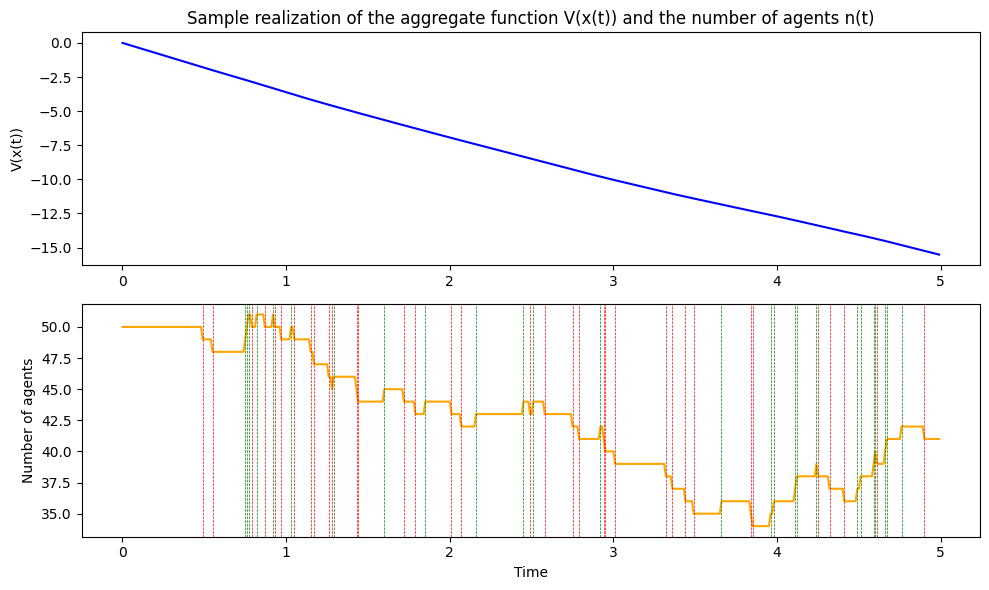

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n0 = 50
p = 0.5
beta_n = 0.1 / n0
delta_n = 0.15 * p
mu = 7
T = 5  # total time in arbitrary units
dt = 0.01  # time step
time = np.arange(0, T, dt)

# Initialize variables
num_agents = np.zeros_like(time)
Vx = np.zeros_like(time)
arrival_times = []
departure_times = []

num_agents[0] = n0

# Simulate the process
for i in range(1, len(time)):
    if np.random.rand() < mu * dt:
        num_agents[i] = num_agents[i-1] + 1
        arrival_times.append(time[i])
    elif np.random.rand() < mu * dt and num_agents[i-1] > 0:
        num_agents[i] = num_agents[i-1] - 1
        departure_times.append(time[i])
    else:
        num_agents[i] = num_agents[i-1]
    
    Vx[i] = Vx[i-1] + beta_n * num_agents[i] * dt - delta_n * num_agents[i] * dt

# Plot
plt.figure(figsize=(10, 6))

# Plot V(x(t))
plt.subplot(2, 1, 1)
plt.plot(time, Vx, label='V(x(t))', color='blue')
plt.ylabel('V(x(t))')
plt.title('Sample realization of the aggregate function V(x(t)) and the number of agents n(t)')

# Plot number of agents
plt.subplot(2, 1, 2)
plt.plot(time, num_agents, label='Number of agents', color='orange')
plt.xlabel('Time')
plt.ylabel('Number of agents')
for at in arrival_times:
    plt.axvline(x=at, color='green', linestyle='--', linewidth=0.5)
for dt in departure_times:
    plt.axvline(x=dt, color='red', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

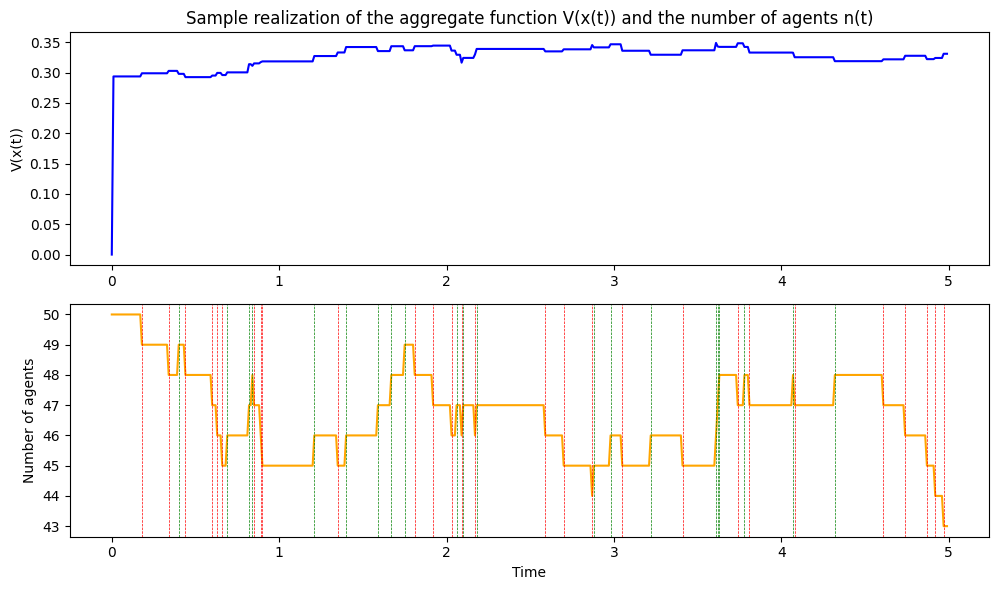

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n0 = 50
p = 0.5
beta_n = 0.1 / n0
delta_n = 0.15 * p
mu = 7
T = 5  # total time in arbitrary units
dt = 0.01  # time step
time = np.arange(0, T, dt)

# Initialize variables
num_agents = np.zeros_like(time)
Vx = np.zeros_like(time)
arrival_times = []
departure_times = []

num_agents[0] = n0
x = np.random.rand(n0)  # Initial state vector

# Simulate the process
for i in range(1, len(time)):
    if np.random.rand() < mu * dt:
        num_agents[i] = num_agents[i-1] + 1
        arrival_times.append(time[i])
        x = np.append(x, np.random.rand())  # Adding a new agent with a random state
    elif np.random.rand() < mu * dt and num_agents[i-1] > 0:
        num_agents[i] = num_agents[i-1] - 1
        departure_times.append(time[i])
        x = np.delete(x, np.random.randint(0, len(x)))  # Removing a random agent
    else:
        num_agents[i] = num_agents[i-1]

    if len(x) > 0:
        Vx[i] = np.linalg.norm(x)**2 / len(x)
    else:
        Vx[i] = 0

# Ensure V(x(t)) remains between 0 and 1
Vx = np.clip(Vx, 0, 1)

# Plot
plt.figure(figsize=(10, 6))

# Plot V(x(t))
plt.subplot(2, 1, 1)
plt.plot(time, Vx, label='V(x(t))', color='blue')
plt.ylabel('V(x(t))')
plt.title('Sample realization of the aggregate function V(x(t)) and the number of agents n(t)')

# Plot number of agents
plt.subplot(2, 1, 2)
plt.plot(time, num_agents, label='Number of agents', color='orange')
plt.xlabel('Time')
plt.ylabel('Number of agents')
for at in arrival_times:
    plt.axvline(x=at, color='green', linestyle='--', linewidth=0.5)
for dt in departure_times:
    plt.axvline(x=dt, color='red', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


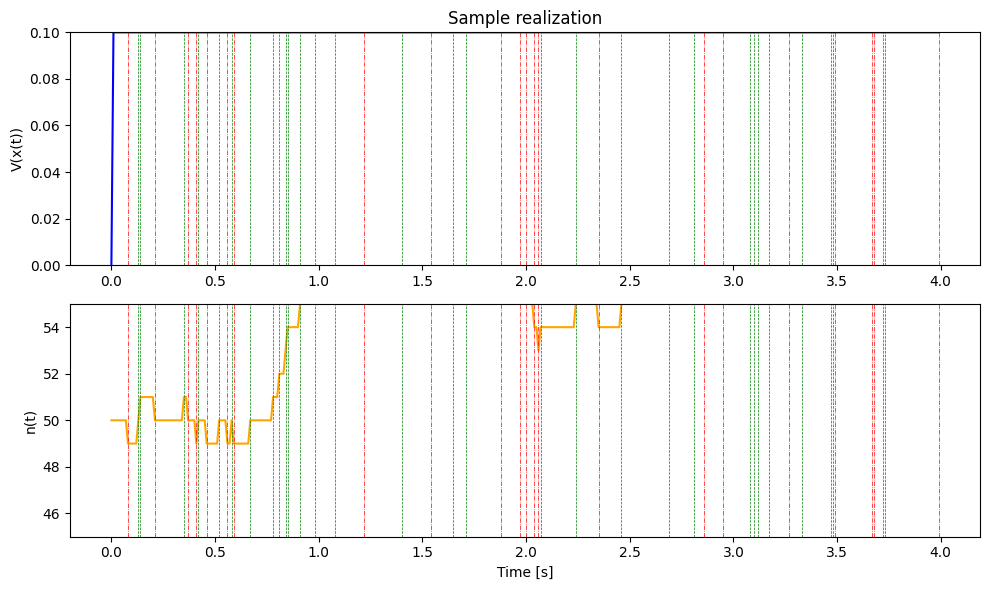

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n0 = 50
p = 0.5
beta_n = 0.1 / n0
delta_n = 1.5 * p * 0.1  # = 1.5 * p * beta_bar
mu = 7
T = 4  # total time in arbitrary units
dt = 0.01  # time step
time = np.arange(0, T, dt)

# Initialize variables
num_agents = np.zeros_like(time)
Vx = np.zeros_like(time)
arrival_times = []
departure_times = []

num_agents[0] = n0
x = np.random.uniform(0.5 - np.sqrt(1/12), 0.5 + np.sqrt(1/12), n0)  # Initial state vector with mean 0.5 and variance 1/12

# Simulate the process
for i in range(1, len(time)):
    if np.random.rand() < mu * dt:
        num_agents[i] = num_agents[i-1] + 1
        arrival_times.append(time[i])
        new_agent_state = np.random.uniform(0.5 - np.sqrt(1/12), 0.5 + np.sqrt(1/12))
        x = np.append(x, new_agent_state)  # Adding a new agent with a state from the specified distribution
    elif np.random.rand() < mu * dt and num_agents[i-1] > 0:
        num_agents[i] = num_agents[i-1] - 1
        departure_times.append(time[i])
        x = np.delete(x, np.random.randint(0, len(x)))  # Removing a random agent
    else:
        num_agents[i] = num_agents[i-1]

    if len(x) > 0:
        Vx[i] = np.linalg.norm(x)**2 / len(x)
    else:
        Vx[i] = 0

# Ensure V(x(t)) remains between 0 and 0.1
Vx = np.clip(Vx, 0, 0.1)

# Plot
plt.figure(figsize=(10, 6))

# Plot V(x(t))
plt.subplot(2, 1, 1)
plt.plot(time, Vx, label='V(x(t))', color='blue')
plt.ylabel('V(x(t))')
plt.title('Sample realization')
for at in arrival_times:
    plt.axvline(x=at, color='green', linestyle='--', linewidth=0.5)
for dt in departure_times:
    plt.axvline(x=dt, color='red', linestyle='-.', linewidth=0.5)
plt.ylim(0, 0.1)

# Plot number of agents
plt.subplot(2, 1, 2)
plt.plot(time, num_agents, label='Number of agents', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('n(t)')
for at in arrival_times:
    plt.axvline(x=at, color='green', linestyle='--', linewidth=0.5)
for dt in departure_times:
    plt.axvline(x=dt, color='red', linestyle='-.', linewidth=0.5)
plt.ylim(45, 55)

plt.tight_layout()
plt.show()


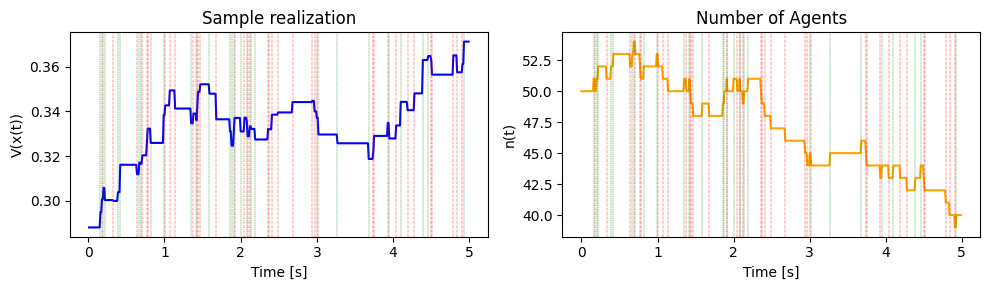

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n0 = 50
p = 0.5
beta_n = 0.1 / n0
delta_n = 0.15 * p
mu_a = 6  # Arrival rate
mu_d = 8  # Departure rate
T = 5  # total time in arbitrary units
dt = 0.01  # time step
time = np.arange(0, T, dt)

# Initialize variables
num_agents = np.zeros_like(time)
Vx = np.zeros_like(time)
arrival_times = []
departure_times = []

num_agents[0] = n0
x = np.random.rand(n0)  # Initial state vector

# Simulate the process
for i in range(1, len(time)):
    if np.random.rand() < mu_a * dt:
        num_agents[i] = num_agents[i-1] + 1
        arrival_times.append(time[i])
        x = np.append(x, np.random.rand())  # Adding a new agent with a random state
    elif np.random.rand() < mu_d * dt and num_agents[i-1] > 0:
        num_agents[i] = num_agents[i-1] - 1
        departure_times.append(time[i])
        x = np.delete(x, np.random.randint(0, len(x)))  # Removing a random agent
    else:
        num_agents[i] = num_agents[i-1]

    if len(x) > 0:
        Vx[i] = np.linalg.norm(x)**2 / len(x)
    else:
        Vx[i] = 0

# Ensure V(x(t)) remains between 0 and 1
Vx = np.clip(Vx, 0, 1)

# Plot
plt.figure(figsize=(10, 3))

# Plot V(x(t))
plt.subplot(1, 2, 1)
plt.plot(time[1:], Vx[1:], label='V(x(t))', color='blue')
plt.ylabel('V(x(t))')
plt.xlabel('Time [s]')
plt.title('Sample realization')
for at in arrival_times:
    plt.axvline(x=at, color='green', linestyle='--', linewidth=0.3)
for dt in departure_times:
    plt.axvline(x=dt, color='red', linestyle='-.', linewidth=0.3)

# Plot number of agents
plt.subplot(1,2, 2)
plt.plot(time, num_agents, label='Number of agents', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('n(t)')
for at in arrival_times:
    plt.axvline(x=at, color='green', linestyle='--', linewidth=0.3)
for dt in departure_times:
    plt.axvline(x=dt, color='red', linestyle='-.', linewidth=0.3)
plt.title('Number of Agents')
plt.tight_layout()
plt.show()

In [43]:
!pip install gym==0.7.4

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.3/884.3 kB 5.2 MB/s eta 0:00:00a 0:00:01m
  Created wheel for gym: filename=gym-0.7.4-py3-none-any.whl size=204690 sha256=ced43cd1eeec81a519a36f719e60134ef394f8393a864735bb6239341de6a7d7
  Stored in directory: /home/sarahl/.cache/pip/wheels/de/55/26/d9b9f975bc80a53913520dd7ded672660cf82a01ac3b0a8769
Successfully built gym


In [44]:
import gym
from gym import spaces
import numpy as np

class SISEpidemicEnv(gym.Env):
    def __init__(self, n0=50, beta=0.03, delta=0.1, mu_a=7, mu_d=7, p=0.5, max_steps=200):
        super(SISEpidemicEnv, self).__init__()
        self.n0 = n0
        self.beta = beta
        self.delta = delta
        self.mu_a = mu_a
        self.mu_d = mu_d
        self.p = p
        self.max_steps = max_steps
        
        self.action_space = spaces.Discrete(3)  # 0: no intervention, 1: vaccination, 2: quarantine
        self.observation_space = spaces.Box(low=0, high=1, shape=(n0, 2), dtype=np.float32)  # state: [susceptible, infected]
        
        self.reset()
    
    def reset(self):
        self.G = nx.erdos_renyi_graph(self.n0, self.p)
        self.adj_matrix = nx.adjacency_matrix(self.G).toarray()
        self.state = np.zeros((self.n0, 2))
        self.state[:, 0] = 1  # All nodes are initially susceptible
        self.steps = 0
        return self.state
    
    def step(self, action):
        reward = 0
        # Apply action
        if action == 1:  # Vaccination
            susceptible_nodes = np.where(self.state[:, 0] == 1)[0]
            if len(susceptible_nodes) > 0:
                node_to_vaccinate = np.random.choice(susceptible_nodes)
                self.state[node_to_vaccinate, 0] = 0
                reward -= 1  # Cost for vaccination
        elif action == 2:  # Quarantine
            infected_nodes = np.where(self.state[:, 1] == 1)[0]
            if len(infected_nodes) > 0:
                node_to_quarantine = np.random.choice(infected_nodes)
                self.state[node_to_quarantine, 1] = 0
                reward -= 1  # Cost for quarantine
        
        # Infection and recovery process
        for i in range(self.n0):
            if self.state[i, 1] == 1:  # Infected
                if np.random.rand() < self.delta:
                    self.state[i, 1] = 0  # Recovered
            else:  # Susceptible
                neighbors = np.where(self.adj_matrix[i] == 1)[0]
                for neighbor in neighbors:
                    if self.state[neighbor, 1] == 1 and np.random.rand() < self.beta:
                        self.state[i, 0] = 0  # Infected
                        self.state[i, 1] = 1
                        reward -= 10  # Penalty for infection
                        break
        
        # Arrivals
        if np.random.rand() < self.mu_a:
            new_infection_prob = np.random.rand()
            new_node_state = 1 if np.random.rand() < new_infection_prob else 0
            self.state = np.append(self.state, [[1 - new_node_state, new_node_state]], axis=0)
            new_row = np.zeros((1, self.state.shape[0] - 1))
            new_col = np.zeros((self.state.shape[0], 1))
            self.adj_matrix = np.hstack((self.adj_matrix, new_col[:-1]))
            self.adj_matrix = np.vstack((self.adj_matrix, np.hstack((new_row, np.zeros((1, 1))))))
            new_edges = np.random.rand(self.state.shape[0] - 1) < self.p
            self.adj_matrix[-1, :-1] = new_edges
            self.adj_matrix[:-1, -1] = new_edges
        
        # Departures
        if np.random.rand() < self.mu_d and self.state.shape[0] > 1:
            departing_node = np.random.randint(0, self.state.shape[0])
            self.state = np.delete(self.state, departing_node, axis=0)
            self.adj_matrix = np.delete(self.adj_matrix, departing_node, axis=0)
            self.adj_matrix = np.delete(self.adj_matrix, departing_node, axis=1)
        
        self.steps += 1
        done = self.steps >= self.max_steps
        return self.state, reward, done, {}

env = SISEpidemicEnv()


import random

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000

# Initialize Q-table
q_table = np.zeros((env.observation_space.shape[0], env.action_space.n))

def choose_action(state, q_table, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

def update_q_table(q_table, state, action, reward, next_state, alpha, gamma):
    best_next_action = np.argmax(q_table[next_state])
    td_target = reward + gamma * q_table[next_state][best_next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = choose_action(state, q_table, epsilon)
        next_state, reward, done, _ = env.step(action)
        update_q_table(q_table, state, action, reward, next_state, alpha, gamma)
        state = next_state
        total_reward += reward
    
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

print("Training completed.")


state = env.reset()
done = False
total_reward = 0

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, _ = env.step(action)
    total_reward += reward

print(f"Total Reward: {total_reward}")


TypeError: Box.__init__() got an unexpected keyword argument 'dtype'